# Importing Packages


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import make_pipeline

%matplotlib inline
np.random.seed(15)

In [40]:
# train_dataset = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/train.csv')
# test_dataset = pd.read_csv('/kaggle/input/tabular-playground-series-aug-2022/test.csv')

train_dataset = pd.read_csv('train.csv')
test_dataset = pd.read_csv('test.csv')

In [41]:
train_dataset.head(10)

# Visualizing Distributions

In [42]:
# Code By:  https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense

# import warnings
# float_cols = [f for f in train_dataset.columns if train_dataset[f].dtype == float]

# fig, axs = plt.subplots(4, 4, figsize=(12,12))
# for f, ax in zip(float_cols, axs.ravel()):
#     mi = min(train_dataset[f].min(), test_dataset[f].min())
#     ma = max(train_dataset[f].max(), test_dataset[f].max())
#     bins = np.linspace(mi, ma, 50)
#     ax.hist(train_dataset[f], bins=bins, alpha=0.5, density=True, label='train')
#     ax.hist(test_dataset[f], bins=bins, alpha=0.5, density=True, label='test')
#     ax.set_xlabel(f)
#     if ax == axs[0, 0]: ax.legend(loc='lower left')
        
#     ax2 = ax.twinx()
#     total, _ = np.histogram(train_dataset[f], bins=bins)
#     failures, _ = np.histogram(train_dataset[f][train_dataset.failure == 1], bins=bins)
#     with warnings.catch_warnings(): # ignore divide by zero for empty bins
#         warnings.filterwarnings('ignore', category=RuntimeWarning)
#         ax2.scatter((bins[1:] + bins[:-1]) / 2, failures / total,
#                     color='m', s=10, label='failure probability')
#     ax2.set_ylim(0, 0.5)
#     ax2.tick_params(axis='y', colors='m')
#     if ax == axs[0, 0]: ax2.legend(loc='upper right')
# plt.tight_layout(w_pad=1)
# plt.suptitle('Train and test distributions of the continuous features', fontsize=20, y=1.02)
# plt.savefig('distributions.png')
# plt.show()

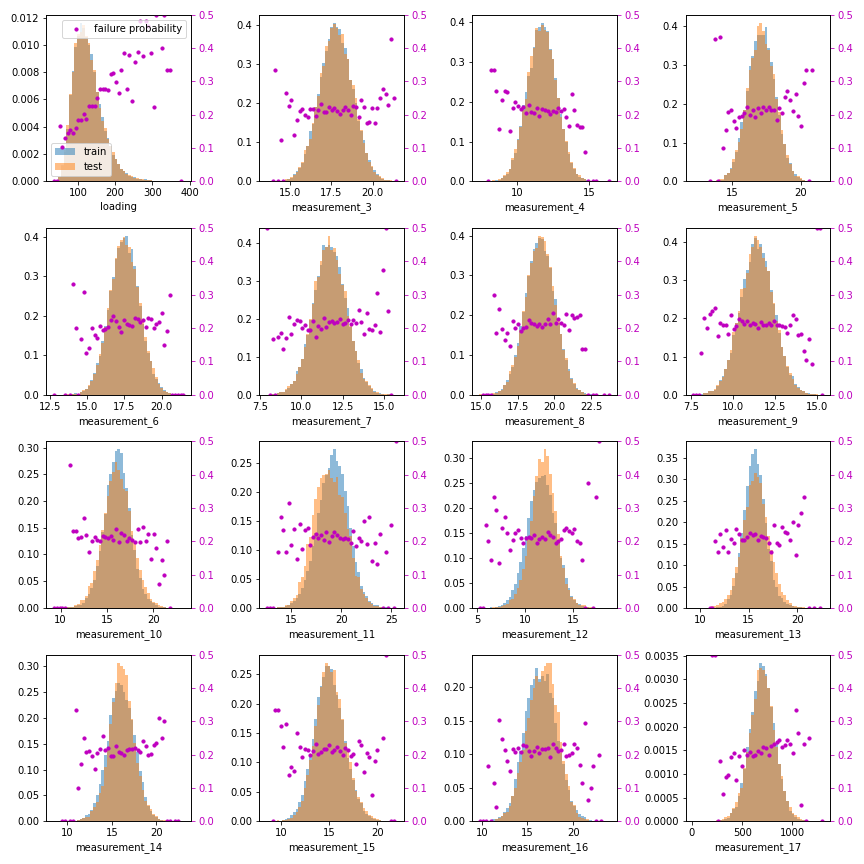

In [43]:
# """   Code By:  https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense   """

# int_cols = [f for f in train_dataset.columns if train_dataset[f].dtype == int]
# int_cols.remove('id')
# _, axs = plt.subplots(2, 3, figsize=(12, 8))
# i=0
# for f, ax in zip(int_cols, axs.ravel()):
#   if i<5:
#     temp1 = train_dataset.failure.groupby(train_dataset[f]).agg(['mean', 'size'])
#     ax.bar(temp1.index, temp1['size'] / len(train_dataset), alpha=0.5, label='train')
#     temp2 = test_dataset[f].value_counts()
#     ax.bar(temp2.index, temp2 / len(test_dataset), alpha=0.5, label='test')
#     ax.set_xlabel(f)
#     ax.set_ylabel('frequency')

#     ax2 = ax.twinx()
#     ax2.scatter(temp1.index, temp1['mean'],
#                 color='m', label='failure probability')
#     ax2.set_ylim(0, 0.5)
#     ax2.tick_params(axis='y', colors='m')
#     if ax == axs[0, 0]: ax2.legend(loc='upper right')
#     i+=1

# axs[0, 0].legend()
# axs[1, 2].axis('off')
# plt.tight_layout(w_pad=1)
# plt.suptitle('Train and test distributions of the integer features', fontsize=20, y=1.02)
# plt.savefig('int_distributions.png')
# plt.show()
# del temp1, temp2

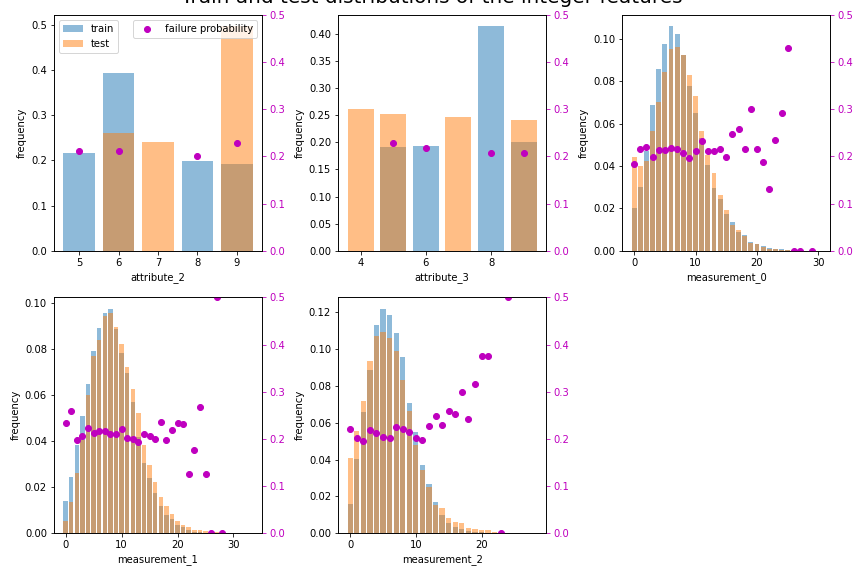

In [44]:
# Code By:  https://www.kaggle.com/code/ambrosm/tpsaug22-eda-which-makes-sense

# string_cols = [f for f in train_dataset.columns if train_dataset[f].dtype == object]

# _, axs = plt.subplots(1, 3, figsize=(12, 5))
# for f, ax in zip(string_cols, axs.ravel()):
#     temp1 = train_dataset[f].value_counts(dropna=False, normalize=True)
#     temp2 = test_dataset[f].value_counts(dropna=False, normalize=True)
#     values = sorted(set(temp1.index).union(temp2.index))
#     temp1 = temp1.reindex(values)
#     temp2 = temp2.reindex(values)
#     ax.bar(range(len(values)), temp1, alpha=0.5, label='train')
#     ax.bar(range(len(values)), temp2, alpha=0.5, label='test')
#     ax.set_xlabel(f)
#     ax.set_ylabel('frequency')
#     ax.set_xticks(range(len(values)), values)
#     temp1 = train_dataset.failure.groupby(train_dataset[f]).agg(['mean', 'size'])
#     temp1 = temp1.reindex(values)
#     ax2 = ax.twinx()
#     ax2.scatter(range(len(values)), temp1['mean'],
#                 color='m', label='failure probability')
#     ax2.tick_params(axis='y', colors='m')
#     ax2.set_ylim(0, 0.5)
#     if ax == axs[0]: ax2.legend(loc='lower right')

# axs[0].legend()
# plt.suptitle('Train and test distributions of the string features', fontsize=20, y=0.96)
# plt.tight_layout(w_pad=1)
# plt.savefig('str_distributions.png')
# # plt.show()
# del temp1, temp2   

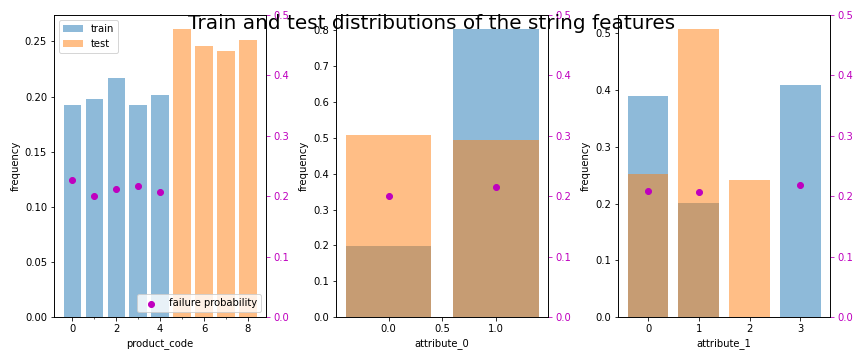

# Data Wrangling

In [45]:
# loading feature is right skewed, so applying log transformation to normalize

train_dataset['loading']=np.log(train_dataset['loading'])
test_dataset['loading']=np.log(test_dataset['loading'])


In [46]:
# id columns is irrelevent for making predictions

train_dataset.drop(columns=['id'],inplace=True)
test_dataset.drop(columns=['id'],inplace=True)

In [47]:
corr = train_dataset.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(14, 14), facecolor='#EAECEE')
cmap = sns.color_palette("rainbow", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1., center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.75},fmt='.2f')

ax.set_title('Correlation heatmap', fontsize=24, y= 1.05)
colorbar = ax.collections[0].colorbar

# Dealing With Missing Values

In [48]:
df=train_dataset.isna().sum()

In [49]:
missing_vals=[]
df_train_temp = train_dataset[train_dataset['loading'].isna() & train_dataset['failure']==1]
missing_vals.append(['loading',len(df_train_temp),df['loading']-len(df_train_temp),len(df_train_temp)/df['loading']])
for i in range(18):
  m='measurement_'+str(i)
  df_train_temp = train_dataset[train_dataset[m].isna() & train_dataset['failure']==1]
  missing_vals.append([m,len(df_train_temp),df[m]-len(df_train_temp),len(df_train_temp)/df[m]])
missing_values=pd.DataFrame(missing_vals,columns=['feature','failure','non_failure','failure_ratio'])

In [50]:
missing_values

measurement_3 and measurement_5 seems to be outliers.

so they can be used as an extra features

In [51]:
train_dataset['m3_missing']=train_dataset['measurement_3'].isna()
train_dataset['m5_missing']=train_dataset['measurement_5'].isna()

test_dataset['m3_missing']=test_dataset['measurement_3'].isna()
test_dataset['m5_missing']=test_dataset['measurement_5'].isna()


train_dataset['m3_missing'] = train_dataset['m3_missing'].replace({True:1,False:0})
train_dataset['m5_missing'] = train_dataset['m5_missing'].replace({True:1,False:0})

test_dataset['m3_missing'] = test_dataset['m3_missing'].replace({True:1,False:0})
test_dataset['m5_missing'] = test_dataset['m5_missing'].replace({True:1,False:0})

# Filling missing values with mode values of each column according to the product code

In [52]:
from scipy import stats
def fill_missing_values(dataset):
  df=stats.mode(dataset)
  columns=dataset.columns
  i=0
  for col in columns:
    dataset[col].fillna(value=df[0][0][i],inplace=True)
    i+=1
  return dataset

df_A=train_dataset[train_dataset['product_code']=='A']
df_B=train_dataset[train_dataset['product_code']=='B']
df_C=train_dataset[train_dataset['product_code']=='C']
df_D=train_dataset[train_dataset['product_code']=='D']
df_E=train_dataset[train_dataset['product_code']=='E']

df_F=test_dataset[test_dataset['product_code']=='F']
df_G=test_dataset[test_dataset['product_code']=='G']
df_H=test_dataset[test_dataset['product_code']=='H']
df_I=test_dataset[test_dataset['product_code']=='I']

df_A = fill_missing_values(df_A)
df_B = fill_missing_values(df_B)
df_C = fill_missing_values(df_C)
df_D = fill_missing_values(df_D)
df_E = fill_missing_values(df_E)

df_F = fill_missing_values(df_F)
df_G = fill_missing_values(df_G)
df_H = fill_missing_values(df_H)
df_I = fill_missing_values(df_I)


train_dataset = pd.concat([df_A,df_B,df_C,df_D,df_E])
test_dataset = pd.concat([df_F,df_G,df_H,df_I])
del([df_A,df_B,df_C,df_D,df_E,df_F,df_G,df_H,df_I])

# Feature Engineering

In [53]:
train_dataset['area']=train_dataset['attribute_2']*train_dataset['attribute_3']
test_dataset['area']=test_dataset['attribute_2']*test_dataset['attribute_3']
train_dataset.drop(columns=['attribute_2',	'attribute_3'],inplace=True)
test_dataset.drop(columns=['attribute_2',	'attribute_3'],inplace=True)

In [54]:
train_dataset = pd.get_dummies(train_dataset,columns=['attribute_0',	'attribute_1'])
test_dataset = pd.get_dummies(test_dataset,columns=['attribute_0',	'attribute_1'])
train_dataset['attribute_1_material_8']=0
test_dataset['attribute_1_material_7']=0

In [55]:
train_dataset.drop(columns=['product_code'],inplace=True)
test_dataset.drop(columns=['product_code'],inplace=True)

In [56]:
print("Missing values in Train dataset: ",train_dataset.isna().sum().sum())
print("Missing values in Test dataset: ",test_dataset.isna().sum().sum())

# Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
def scaling(dataset):
    scaler=StandardScaler()
    scaled_dataset=scaler.fit_transform(dataset)
    scaled_dataset=pd.DataFrame(scaled_dataset,columns=dataset.columns)
    return scaled_dataset

In [58]:
cols_to_scale = ['loading','measurement_3', 'measurement_4',
       'measurement_5', 'measurement_6', 'measurement_7', 'measurement_8',
       'measurement_9', 'measurement_10', 'measurement_11', 'measurement_12',
       'measurement_13', 'measurement_14', 'measurement_15', 'measurement_16',
       'measurement_17','area']
train_dataset[cols_to_scale] = scaling(train_dataset[cols_to_scale])
test_dataset[cols_to_scale] = scaling(test_dataset[cols_to_scale])

In [59]:
train_dataset.head()

In [60]:
# Taking average of only those measurement features having different distributions as compared to test dataset which can be seen in above plots

train_dataset['m1']=(train_dataset['measurement_10']+train_dataset['measurement_11']+train_dataset['measurement_12']+train_dataset['measurement_13']+train_dataset['measurement_14']+train_dataset['measurement_16']) /6
test_dataset['m1']=(test_dataset['measurement_10']+test_dataset['measurement_11']+test_dataset['measurement_12']+test_dataset['measurement_13']+test_dataset['measurement_14']+test_dataset['measurement_16']) /6

train_dataset.drop(columns=['measurement_10',	'measurement_11',	'measurement_12',	'measurement_13',	'measurement_14',	'measurement_16'],inplace=True)
test_dataset.drop(columns=['measurement_10',	'measurement_11',	'measurement_12',	'measurement_13',	'measurement_14',	'measurement_16'],inplace=True)

In [61]:
train_dataset.head()

# Splitting Data

In [62]:
Y = train_dataset.pop('failure')

In [63]:
from sklearn.model_selection import train_test_split

x_train, x_test , y_train , y_test = train_test_split(train_dataset,Y,test_size=0.2,stratify=Y) # 80-20 split

print('X_train:', x_train.shape)
print('y_train:', y_train.shape)
print('X_test:', x_test.shape)
print('y_test:', y_test.shape)

# Model FItting

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import StratifiedKFold

In [65]:
skf = StratifiedKFold(n_splits=10)

In [66]:
models = {
    'logistic regression' : LogisticRegression(C=0.8, class_weight='balanced', l1_ratio=0.85, max_iter=1000, penalty='elasticnet', solver='saga') ,
    'Lassos' : LassoCV(max_iter=3000,verbose=False,eps=1e-04,n_alphas=1000,
    ),
    'Ridge' : Ridge(max_iter=5000, solver='sag'),
    'naive bayes' : GaussianNB()
}

for name, model in models.items():
    model.fit(x_train, y_train)
    print(f'{name} trained')

results = {}

for name, model in models.items():
    result = cross_val_score(model, x_train, y_train, scoring= 'roc_auc', cv= skf)
    results[name] = result

for name, result in results.items():
    print("----------------")
    print(f'{name} : {np.mean(result)}')

# Evaluating Models

In [ ]:
for name, model in models.items():
    y_pred = model.predict(x_test)
    score = roc_auc_score(y_test,y_pred)
    print(name+" : "+str(score))

Lasso and Ridge are clearly performing well

# HyperParameter Tuning

In [ ]:
params_dt = {'eps':[1e-3, 1e-1],'max_iter':[1200,2000],'selection':['cyclic', 'random']}
Lasso = LassoCV()

In [ ]:
grid_dt = GridSearchCV(estimator=Lasso,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=skf,
                       n_jobs=-1)

grid_dt.fit(x_train,y_train)
y_pred = grid_dt.predict(x_test)
best_model = grid_dt.best_estimator_
print(best_model)
y_pred=best_model.predict(x_test)
score = roc_auc_score(y_test,y_pred)
print(score)

After HperParameter Tuning:    
Best Model: LassoCV(max_iter=1200)  
Score on Test Set: 0.5907132523392951

In [ ]:
params_dt = {'solver':['svd','cholesky','lsqr','sparse_cg','sag','saga'],'max_iter':[1500,2000]}
ridge = Ridge()

In [ ]:
grid_dt = GridSearchCV(estimator=ridge,
                       param_grid=params_dt,
                       scoring='roc_auc',
                       cv=skf,
                       n_jobs=-1)

grid_dt.fit(x_train,y_train)
y_pred = grid_dt.predict(x_test)
best_model = grid_dt.best_estimator_
print(best_model)
y_pred=best_model.predict(x_test)
score = roc_auc_score(y_test,y_pred)
print(score)

After HperParameter Tuning:    
Best Model: Ridge(max_iter=2000, solver='sag')  
Score on Test Set: 0.591333186686746

In [ ]:
y_pred = best_model.predict(test_dataset)
res = pd.DataFrame({'id':[x for x in range(26570,47345)],'failure':y_pred})
res.to_csv('submission.csv',index=False)